<a href="https://colab.research.google.com/github/KharismadinaHM/Darth-urany/blob/master/M6_Data_Cleaning_dan_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Kharismadina Hijra Muhamad
# Kelas: 3KA01
# NPM  : 13119305


# Praktikum VI



Selamat datang pada praktikum unggulan minggu ke - 5. 


![1_L0464qoX7pSkIQMBcF73Tg.png](attachment:1_L0464qoX7pSkIQMBcF73Tg.png)

Gambar diatas menunjukkan tahapan yang Anda perlu lakukan ketika ingin membangun sebuah model artificial intelligence. 
Pada minggu ini Anda akan melakukan fase data cleansing atau pembersihan data. Tahapan ini biasanya dilakuakan sebelum anda melakukan tahapan EDA yang telah Anda pelajari sebelumnya. Tahapan ini perlu dilakukan jika data yang Anda miliki tidak 'bersih', sehingga perlu dilakukan pemrosesan terlebih dahulu (tahapan pre-processing) sebelum data tersebut masuk kedalam algoritma pembangunan model. 

Materi praktikum ini dibagi menjadi 2 bagian dengan menggunakan dua dataset yang berbeda. Adapun operasi akan Anda lakukan antara lain 
* Melihat bentuk data (shape) dari data train dan test set
* Cek data NaN, bila ada maka hapus/drop data NaN tsb
* Cek outliers, bila ada maka hapus/drop outliers tsb
* Melakukan konversi jenis kolom yang relevan.
* Melakukan transformasi terhadap data yang bersifat kategori 

Operasi yang Anda lakukan pada tahapan pembersihan data sangat bergantung pada karakteristik permasalahan, karakter data, serta jenis data yang terdapat dalam dataset Anda. Sebagai referensi, berikut bagan dari berbagai macam tipe data yang mungkin Anda temui dalam sebuah dataset. 




![8UUywzzaMhY2ZGHrWE7VkA_b.png](attachment:8UUywzzaMhY2ZGHrWE7VkA_b.png)

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset 1

Dataset yang akan Anda gunakan pada praktikum kali ini adalah dataset komposisi beton (concrete).

In [2]:
# Load data train dan test ke dalam pandas dataframe
# dataset : https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv
concrete = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv")

In [3]:
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data train dengan fungsi .shape
concrete.shape

(1030, 9)

In [4]:
# menampilkan 10 data teratas
concrete.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,NaN,NaN,192.0,NaN,889.8,945.0,90,21.86
6,166.8,250.2,NaN,203.5,NaN,975.6,692.6,7,15.75
7,251.4,NaN,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,NaN,NaN,192.0,NaN,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,559.000000,464.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,136.158676,120.288793,181.567282,9.816897,972.918932,773.580485,45.662136,35.817961
std,104.506364,72.351823,33.675470,21.354219,4.580328,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,95.000000,97.850000,164.900000,6.950000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,189.000000,141.000000,192.000000,11.600000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#cek nilai yang hilang / missing values di dalam data train
concrete.isnull().sum().sort_values(ascending=False)

ash             566
slag            471
superplastic    379
strength          0
age               0
fineagg           0
coarseagg         0
water             0
cement            0
dtype: int64

Missing values adalah nilai yang tidak terdefinisi di dataset. Bentuknya beragam, bisa berupa blank cell, ataupun simbol-simbol tertentu seperti NaN (Not a Number), NA (Not Available), ?, -, dan sebagainya. Missing values dapat menjadi masalah dalam analisis data serta tentunya dapat mempengaruhi hasil modelling machine learning.

**Lakukan pemeriksaan dan perubahan data kosong setiap kolom pada data train:**
1. cement (kg)
2. slag (blast furnace slag, kg)
3. ash (fly ash, kg)
4. water (kg)
5. superplastic (superplasticizer, kg)
6. coarseagg (coarse aggregate, kg)
7. fineagg (fine aggregate, kg)
8. age (days, 1-365)
9. strength (Concrete compressive strength, MPa)

### Instruksi Praktikum untuk mahasiswa FIKTI dan FTI (kecuali Teknik Industri, Teknik Mesin dan Agroteknologi)

* Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset concrete.  (Ubah data bernilai NaN menjadi 0)
* Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category', dengan ketentuan :
   1. jika nilai >= 65 = 'Hard'
   2. jika nilai >= 40 = 'Medium'
   3. Jika nilai < 40 = 'Light'
* Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?
* Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah
* Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

### Instruksi Praktikum mahasiswa Tekrek : Teknik Industri, Teknik Mesin, Agroteknologi dan FTSP 

* Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category', dengan ketentuan :
   1. jika nilai >= 65 = 'Hard'
   2. jika nilai >= 40 = 'Medium'
   3. Jika nilai < 40 = 'Light'
* Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?
* Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah
* Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

## JAWABAN ##

## 1. Data Cleansing :

In [7]:
concrete.shape #cek banyak data sebelum dihapus

(1030, 9)

In [8]:
concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
concrete = concrete.drop(concrete[concrete.isnull().any(1)].index, axis = 0)
#Hapus data NaN

In [10]:
#Cek lagi dimensi data 
concrete.shape

(225, 9)

## Hasil Setelah di data cleansing :

In [11]:
concrete.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99
10,151.8,178.1,138.7,167.5,18.3,944.0,694.6,28,36.35
14,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89
15,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97
23,132.0,207.0,161.0,179.0,5.0,867.0,736.0,28,33.30
29,255.0,99.0,77.0,189.0,6.0,919.0,749.0,28,33.80
35,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,28,39.16
37,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,14,47.71
39,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,28,41.41


## 2. Mentransformasikan kolom strength

In [43]:
concrete["strength"] = concrete["strength"].astype('category')
concrete["Category"] = concrete["strength"].cat.codes
concrete[["Category"]].head()

,Category
1,28
9,51
10,92
14,33
15,144


In [52]:
Hard = concrete[concrete["Category"] >= 60]
Medium = concrete[concrete["Category"] >= 40]
Light = concrete[concrete["Category"] < 40]


## 3. Analisis Histogram kolom age dengan strength

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x360 with 0 Axes>

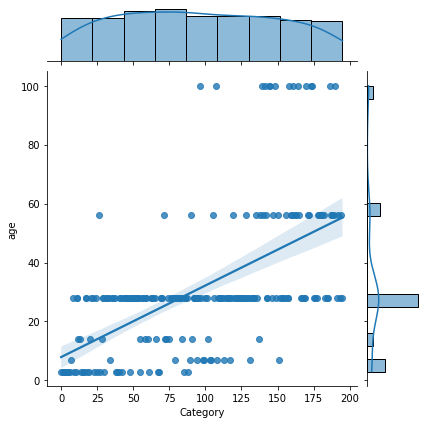

In [60]:
plt.figure(figsize = (5,5))
sns.jointplot(concrete.Category,concrete.age,kind="reg")
plt.show()

##Kesimpulan Diagram

Pada diagram diatas terdapat hubungan kolom age dengan strength yang mana jika strength makin besar maka age juga makin besar. Yang berarti Beton yang mempunyai umur yang panjang memiliki kekuatan paling besar.

## 4. Komposisi concrete

### A. Hard Concrete

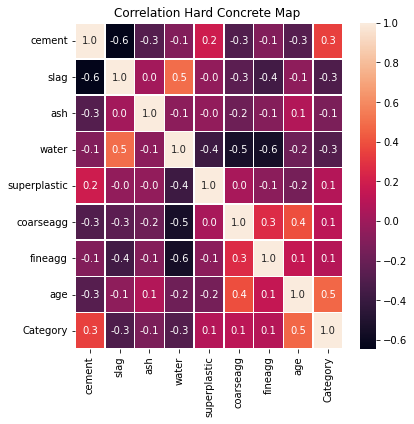

In [62]:
f , ax = plt.subplots(figsize= (6,6))
sns.heatmap(Hard.corr(), annot= True, linewidths = 0.5, fmt = ".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Hard Concrete Map ')
plt.savefig('graph_Hard_correlation.png')
plt.show()

### Penjelasan :
pada concrete category Hard ada korelasi positif antara : colom slag dgn water , coarseagg dgn age, age dgn category . yg mana nilainya hampir ke 0.5. 

## B. Medium Concrete

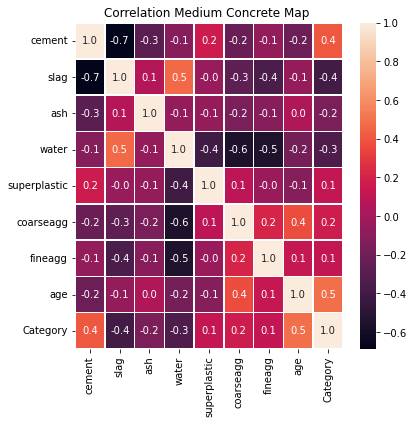

In [63]:
f , ax = plt.subplots(figsize= (6,6))
sns.heatmap(Medium.corr(), annot= True, linewidths = 0.5, fmt = ".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Medium Concrete Map ')
plt.savefig('graph_medium_correlation.png')
plt.show()

### Penjelasan :
pada concrete category Medium ada korelasi positif antara : colom slag dgn water , coarseagg dgn age, age dgn category , cement dengan age . yg mana nilainya  ke 0.4.

## C. Light Concrete

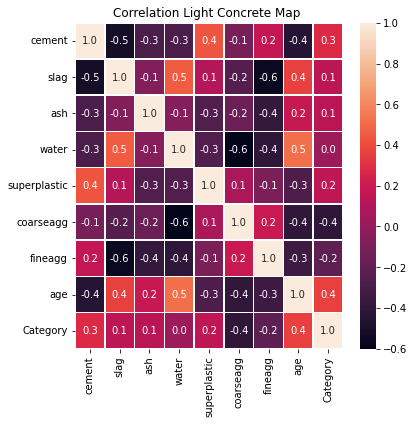

In [64]:
f , ax = plt.subplots(figsize= (6,6))
sns.heatmap(Light.corr(), annot= True, linewidths = 0.5, fmt = ".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Light Concrete Map ')
plt.savefig('graph_medium_correlation.png')
plt.show()

### Penjelasan :
pada concrete category Light ada korelasi positif antara : colom water dgn slag , cement dengan superplastic , water dgn cement , water dgn age , cement dengan category bernilai 0.3 

# Kesimpulan :

Jadi , Kesimpulan pada penelitian concrete ini ada nya pengaruh yang berkorelasi positif terhadap kekuatan Category strength : Hard , Medium , Light.
Kolom yang berkontribusi ialah : water dengan slag , coarseagg dengan age , cement dengan superolastic. Semakin mendekati ke 1 semakin kuat concrete dan age semakin besar / panjang.